In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [21]:
with open("../output/stream/syntentic_run_small_1/small_dataset_0_q63.json", 'r') as f:
  data = json.load(f) 

In [22]:
i_bpp = []
p_bpp = []

for idx, type in enumerate(data['frame_type']):
  if type == 0:
    i_bpp.append(data['frame_bpp'][idx])
  else:
    p_bpp.append(data['frame_bpp'][idx])

i_mean = sum(i_bpp)/len(i_bpp)
p_mean = sum(p_bpp)/len(p_bpp)
savings_coeff = i_mean/p_mean

print("Mean I BPP: {} Mean P BPP: {} Savings Coeff: {}".format(i_mean, p_mean, savings_coeff))

Mean I BPP: 0.34072048611111116 Mean P BPP: 0.0768313962834362 Savings Coeff: 4.434651751663738


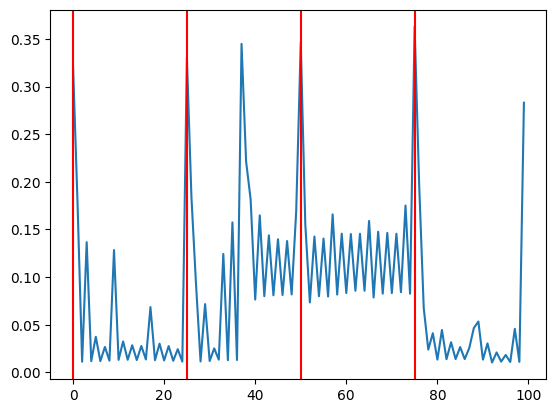

In [23]:
f_types = np.array(data['frame_type'])


plt.plot(data['frame_bpp'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

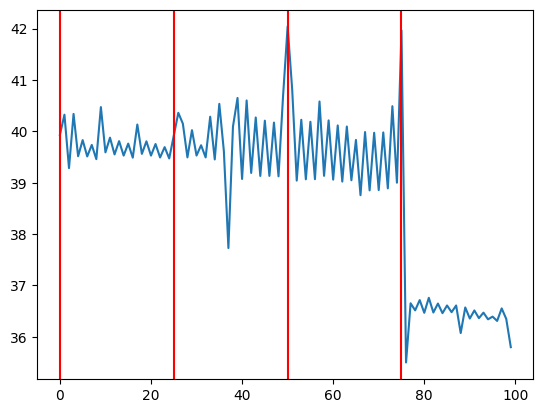

In [24]:
plt.plot(data['frame_psnr'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Straight video

In [25]:
with open("../output/stream/straight_no_intra_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data = json.load(f) 

with open("../output/stream/straight_no_intra_no_refresh_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_n = json.load(f) 

with open("../output/stream/straight_with_intra_32_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_i = json.load(f) 
  

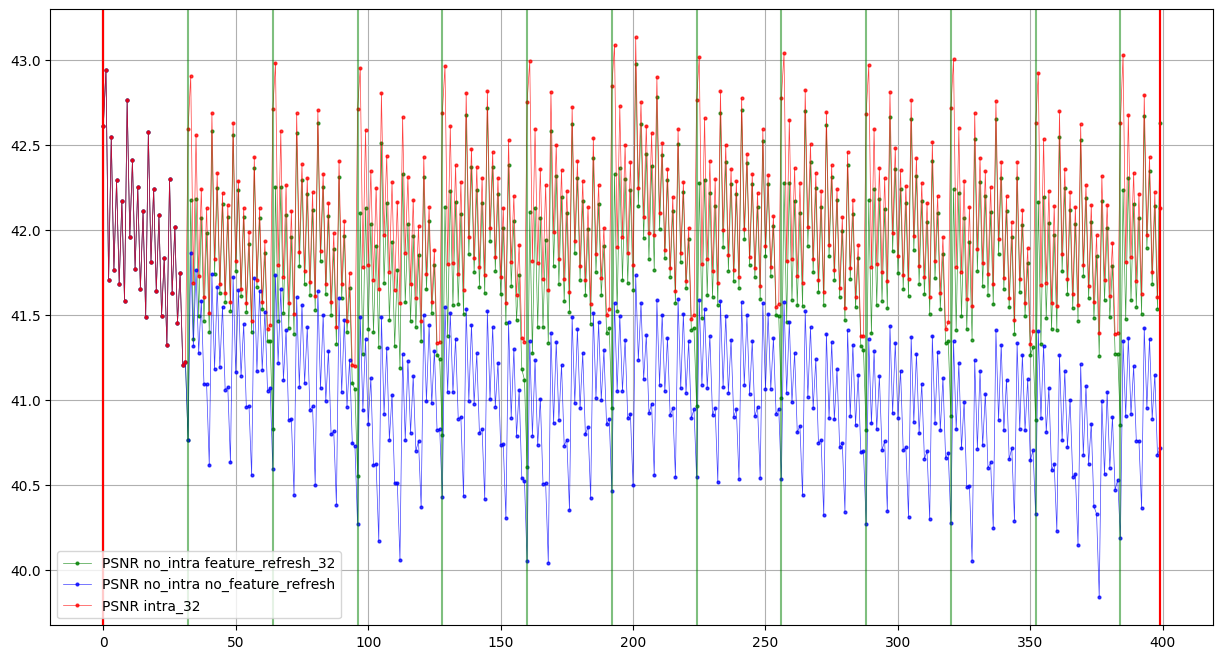

In [26]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_psnr'], label = "PSNR no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_psnr'], label = "PSNR no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_psnr'], label = "PSNR intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_psnr']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

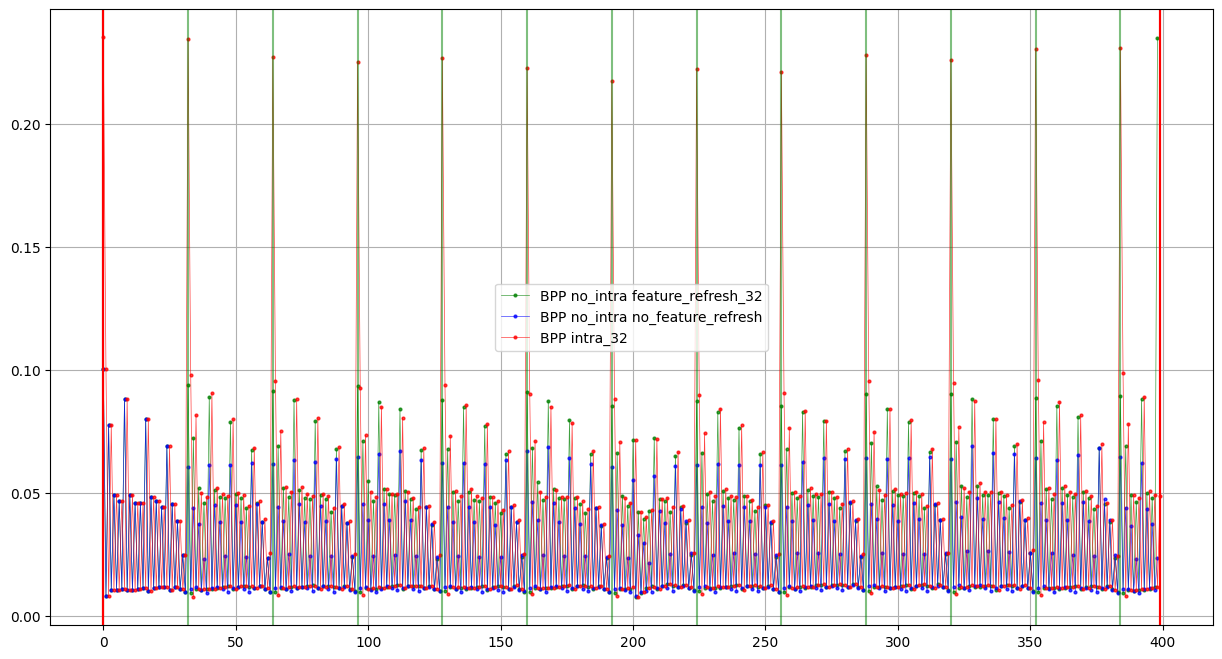

In [27]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_bpp'][1:], label = "BPP no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_bpp'][1:], label = "BPP no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_bpp'], label = "BPP intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_bpp']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Frequent switch video

In [28]:
with open("../output/stream/frequent_no_intra_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data = json.load(f) 

with open("../output/stream/frequent_no_intra_no_refresh_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_n = json.load(f) 

with open("../output/stream/frequent_with_intra_32_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_i = json.load(f)

with open("../output/stream/frequent_pred_intra_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_p = json.load(f)

with open("../output/stream/frequent_pred_decay_intra_2/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_p_d = json.load(f)

with open("../media/syntetic/frequent_dataset_0/reference_points.json", 'r') as f:
  ref_points = json.load(f)
  ref_points = [idx for idx in ref_points if idx < len(freq_data['frame_psnr'])]

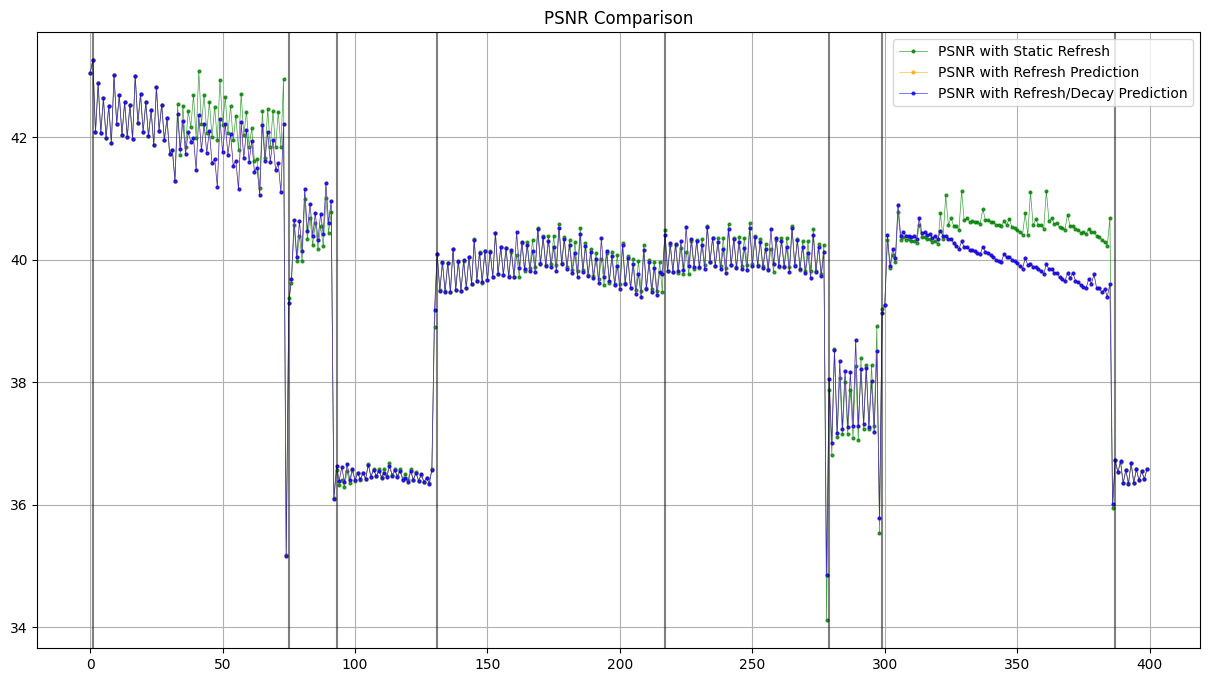

In [29]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_psnr'], label = "PSNR with Static Refresh", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha = 0.75)
# plt.plot(freq_data_n['frame_psnr'], label = "PSNR without Intra-Predictor", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha = 0.75)
# plt.plot(freq_data_i['frame_psnr'], label = "PSNR", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha = 0.75)
plt.plot(freq_data_p['frame_psnr'], label = "PSNR with Refresh Prediction", marker='o', linewidth=0.5, markersize=2, c = 'orange', alpha = 0.75)
plt.plot(freq_data_p_d['frame_psnr'], label = "PSNR with Refresh/Decay Prediction", marker='o', linewidth=0.5, markersize=2, c = 'blue', alpha = 0.75)
plt.title("PSNR Comparison")
plt.legend()

# f_types = np.array(freq_data['frame_type'])
# for idx in np.argwhere(f_types == 0):
#   plt.axvline(x=idx, color='r')

# for idx in np.arange(0, len(freq_data['frame_psnr']), 32):
#   plt.axvline(x=idx, color='g', alpha=0.5)

for idx in ref_points:
  plt.axvline(x=idx, color='k', alpha=0.5)


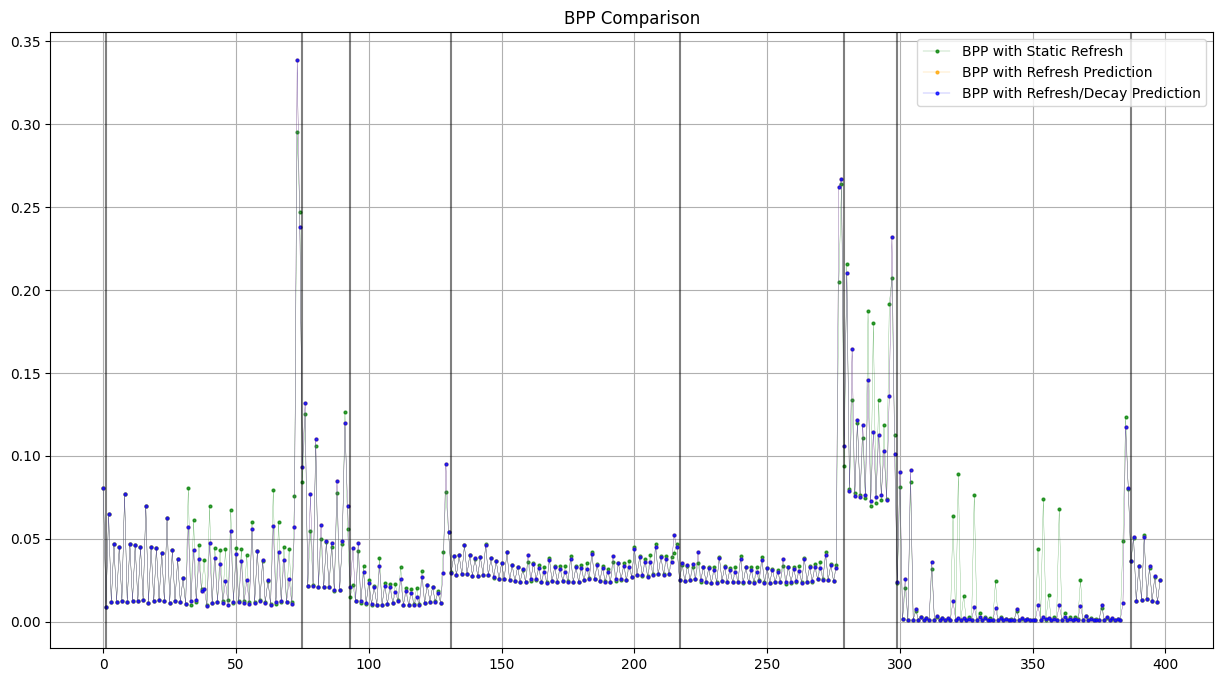

In [30]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_bpp'][1:], label = "BPP with Static Refresh", marker='o', linewidth=0.2, markersize=2, c = 'g', alpha = 0.75)
# plt.plot(freq_data_n['frame_bpp'][1:], label = "BPP without Refreshes", marker='o', linewidth=0.2, markersize=2, c = 'b', alpha = 0.75)
# plt.plot(freq_data_i['frame_bpp'][1:], label = "BPP with Intraframes", marker='o', linewidth=0.2, markersize=2, c = 'r', alpha = 0.75)
plt.plot(freq_data_p['frame_bpp'][1:], label = "BPP with Refresh Prediction", marker='o', linewidth=0.2, markersize=2, c = 'orange', alpha = 0.75)
plt.plot(freq_data_p_d['frame_bpp'][1:], label = "BPP with Refresh/Decay Prediction", marker='o', linewidth=0.2, markersize=2, c = 'blue', alpha = 0.75)
plt.legend()
plt.title("BPP Comparison")

# for idx in np.arange(0, len(freq_data['frame_bpp']), 32):
#   plt.axvline(x=idx, color='g', alpha=0.5)

# f_types = np.array(freq_data['frame_type'])
# for idx in np.argwhere(f_types == 0):
#   plt.axvline(x=idx, color='r')

for idx in ref_points:
  plt.axvline(x=idx, color='k', alpha=0.5)

In [31]:
# calculate savings for BPP

mean_proc_savings = np.mean(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p['frame_bpp'][1:])) / np.mean(freq_data['frame_bpp'][1:])
median_proc_savings = np.median(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p['frame_bpp'][1:])) / np.median(freq_data['frame_bpp'][1:])

print("Intra Prediction bpp savings: Mean {:.2%} Median {:.2%}".format(mean_proc_savings, median_proc_savings))

Intra Prediction bpp savings: Mean 5.39% Median 0.18%


In [32]:
# calculate lost for PSNR

mean_psnr_savings = np.mean(np.array(freq_data['frame_psnr']) - np.array(freq_data_p['frame_psnr'])) / np.mean(freq_data['frame_psnr'])
median_psnr_savings = np.median(np.array(freq_data['frame_psnr']) - np.array(freq_data_p['frame_psnr'])) / np.median(freq_data['frame_psnr'])

print("Intra Prediction PSNR lost: Mean {:.2%} Median {:.2%}".format(mean_psnr_savings, median_psnr_savings))

Intra Prediction PSNR lost: Mean 0.35% Median 0.04%


In [33]:
# calculate savings for BPP (with Decay)

mean_proc_savings = np.mean(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p_d['frame_bpp'][1:])) / np.mean(freq_data['frame_bpp'][1:])
median_proc_savings = np.median(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_p_d['frame_bpp'][1:])) / np.median(freq_data['frame_bpp'][1:])

print("Intra Prediction bpp savings: Mean {:.2%} Median {:.2%}".format(mean_proc_savings, median_proc_savings))

Intra Prediction bpp savings: Mean 5.39% Median 0.18%


In [34]:
# calculate lost for PSNR (with Decay)

mean_psnr_savings = np.mean(np.array(freq_data['frame_psnr']) - np.array(freq_data_p_d['frame_psnr'])) / np.mean(freq_data['frame_psnr'])
median_psnr_savings = np.median(np.array(freq_data['frame_psnr']) - np.array(freq_data_p_d['frame_psnr'])) / np.median(freq_data['frame_psnr'])

print("Intra Prediction PSNR lost: Mean {:.2%} Median {:.2%}".format(mean_psnr_savings, median_psnr_savings))

Intra Prediction PSNR lost: Mean 0.35% Median 0.04%


In [13]:
np.sum(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_n['frame_bpp'][1:])) * 1920 * 1080 / 400 / 1024

8.40859375

In [14]:
np.mean(np.array(freq_data_i['frame_psnr'][1:]))

39.98865820067695

In [15]:
np.mean(np.array(freq_data_i['frame_psnr'][1:]) - np.array(freq_data['frame_psnr'][1:]))

0.0586007165793167

In [16]:
np.mean(np.array(freq_data['frame_psnr'][1:]) - np.array(freq_data_n['frame_psnr'][1:]))

0.36702408947501153